In [1]:
import requests
import json
import pandas as pd
import networkx as nx
from sys import stdout
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
%matplotlib inline


In [59]:
# functions

def get_WR_json(url: str) -> dict:
    '''
    
    takes: url of a (paged) API json
    returns: (integrated) dictionary representation of json, 
    
    '''
    r = requests.get(url)
    data = json.loads(r.text)
    next_data = data 
    while True: #paging mechanism
        try:
            next_url = next_data['paging']['next'] #why not just "data" (see above)
            #print(next_url)
            r = requests.get(next_url)
            #print('getting next url')
            next_data = json.loads(r.text)
            data['items'].extend(next_data['items'])
            #stdout.write("\rURL: %s, \r%d items" % (next_url, counter))
            #stdout.flush()
        except:
            #print(len(data['items']))
            #print('exiting')
            break
    return data



def get_rel_metrics (url :str = 'https://wikirate.org/Relationship+metrics.json') -> list:
    '''
    
    fetches list of all WikiRate relationship metrics
    
    takes:   url (string) of relationship metrics card (default: 'https://wikirate.org/Relationship+metrics.json')
    returns: list of tuples in the form of (name_of_relationship_metric, url_of_relationship_metric)
    
    '''
    rel_metrics_json = get_WR_json(url)
    rel_metrics = [(x['name'],x['url'][0:-5]+'+all_metric_values.json') for x in rel_metrics_json['items']]
    
    return rel_metrics



def make_graph_from_relationship(url : str):
    '''
    
    Makes NetworkX graph from WikiRate relationship data (jsons) of a given relationship
    
    Parameters:
    url: string of relationship metric json URL
        (eg. 'https://wikirate.org/Commons+Shareholder_Of+all_metric_values.json')
    
    Returns:
    NetworkX Graph object (MultiDiGraph), with 'name' attribute cut out from URL, and some edge attributes
    taken from json data
    
    '''

    G = nx.MultiDiGraph()
    print ("Fetching ", url.split('+')[1])
    rels_json = get_WR_json(url)
    if len(rels_json['items']) == 0: # check if 'items' key in json is empty
        print('\t"items" in json are empty, json not returned')
        return
    else:
        G.name = rels_json['name']
        print('\t Graph/relationship name: ', G.name) 
        rel_urls = [x['url'] for x in rels_json['items']] #to be updated (sep. function?) for controlling years
        rels = []
        for x in rel_urls:
            ego_net_json = get_WR_json(x)
            company_from = ego_net_json['company'] 
            rel_name = ego_net_json['metric']
            ego_net = [
                #(company_from,
                (x['subject_company'],
                 x['object_company'],
                 {'year' : x['year'], 'value' : x['value']}) for x in ego_net_json['items']]
            rels.extend(ego_net)
        G.add_edges_from(rels, Label=rel_name)
        return G

def wr_graphs (relations_data):
    '''
    takes: list of urls of realtionship metrics, eg.
         'https://wikirate.org/Commons+Supplied_By+all_metric_values.json',
    
    returns: list of NetworkX graph objects
    
    '''
    graphs = []
    for x in relations_data:
        G = make_graph_from_relationship(x) # G.name
        if G:
            graphs.append(G)
    print ('done')
    return graphs


In [2]:
# setting path
path ='./results_new_data_subject_comp/'
#print(path+'file.file')

./results_new_data_subject_comp/file.file


In [60]:
# getting current relationship metrics' urls

rel_metrics = get_rel_metrics('https://wikirate.org/Relationship+metrics.json')

relations_data = [x[1] for x in rel_metrics]
display (relations_data)

['https://wikirate.org/OpenCorporates+Controls+all_metric_values.json',
 'https://wikirate.org/OpenCorporates+Subsidiary_Of+all_metric_values.json',
 'https://wikirate.org/Commons+uses_Tungsten_smelted_by+all_metric_values.json',
 'https://wikirate.org/Commons+uses_Tantalum_smelted_by+all_metric_values.json',
 'https://wikirate.org/Commons+uses_Tin_smelted_by+all_metric_values.json',
 'https://wikirate.org/Commons+Shareholder_Of+all_metric_values.json',
 'https://wikirate.org/OpenCorporates+Shareholder_Of+all_metric_values.json',
 'https://wikirate.org/Commons+Has_Factory+all_metric_values.json',
 'https://wikirate.org/Commons+uses_Gold_smelted_by+all_metric_values.json',
 'https://wikirate.org/Commons+Subsidiary_of+all_metric_values.json',
 'https://wikirate.org/Commons+Supplied_By+all_metric_values.json',
 'https://wikirate.org/OpenCorporates+Has_Brands+all_metric_values.json',
 'https://wikirate.org/Proxy_Voting_Research_Group+has_Voting_Authority_over+all_metric_values.json',
 'htt

In [61]:
 graphs = wr_graphs(relations_data)

Fetching  Controls
	 Graph/relationship name:  OpenCorporates+Controls+all metric values
Fetching  Subsidiary_Of
	 Graph/relationship name:  OpenCorporates+Subsidiary Of+all metric values
Fetching  uses_Tungsten_smelted_by
	 Graph/relationship name:  Commons+uses Tungsten smelted by+all metric values
Fetching  uses_Tantalum_smelted_by
	 Graph/relationship name:  Commons+uses Tantalum smelted by+all metric values
Fetching  uses_Tin_smelted_by
	 Graph/relationship name:  Commons+uses Tin smelted by+all metric values
Fetching  Shareholder_Of
	 Graph/relationship name:  Commons+Shareholder Of+all metric values
Fetching  Shareholder_Of
	 Graph/relationship name:  OpenCorporates+Shareholder Of+all metric values
Fetching  Has_Factory
	 Graph/relationship name:  Commons+Has Factory+all metric values
Fetching  uses_Gold_smelted_by
	 Graph/relationship name:  Commons+uses Gold smelted by+all metric values
Fetching  Subsidiary_of
	 Graph/relationship name:  Commons+Subsidiary of+all metric values

In [62]:
# check what graphs have been downloaded
for x in graphs:
    print(graphs.index(x), x.name)


0 OpenCorporates+Controls+all metric values
1 OpenCorporates+Subsidiary Of+all metric values
2 Commons+uses Tungsten smelted by+all metric values
3 Commons+uses Tantalum smelted by+all metric values
4 Commons+uses Tin smelted by+all metric values
5 Commons+Shareholder Of+all metric values
6 OpenCorporates+Shareholder Of+all metric values
7 Commons+Has Factory+all metric values
8 Commons+uses Gold smelted by+all metric values
9 Commons+Subsidiary of+all metric values
10 Commons+Supplied By+all metric values
11 Proxy Voting Research Group+has Voting Authority over+all metric values
12 Proxy Voting Research Group+has Voting Authority over weighted+all metric values
13 Proxy Voting Research Group+voted with management of+all metric values
14 OpenCorporates+has Branch+all metric values


In [63]:
#reverse 'subsidiary' relationships so that they correspond to 'supplied_by' in direction
graphs[1] = graphs[1].reverse()
graphs[9] = graphs[9].reverse()

In [7]:
# compose complete graph from relationship graphs and display basic info

G_full = nx.all.compose_all(graphs)
G_full.name = 'WR graph'
print(nx.info(G_full))

Name: WR graph
Type: MultiDiGraph
Number of nodes: 24006
Number of edges: 75950
Average in degree:   3.1638
Average out degree:   3.1638


In [69]:
#save full graph
nx.write_gpickle(G_full, path+"full.gpickle")

In [70]:
#save graphs
nx.write_gpickle(graphs, path+"graphs.gpicle")

In [3]:
#read full graph
graphs_from_pickle = nx.read_gpickle(path+"full.gpicle")

In [3]:
#read graphs
graphs_from_pickle = nx.read_gpickle(path+"graphs.gpicle")

In [5]:
#print basic information for each graph
for x in graphs:
    print(nx.info(x))
    print()

Name: OpenCorporates+Controls+all metric values
Type: MultiDiGraph
Number of nodes: 518
Number of edges: 362
Average in degree:   0.6988
Average out degree:   0.6988

Name: OpenCorporates+Subsidiary Of+all metric values
Type: MultiDiGraph
Number of nodes: 7
Number of edges: 4
Average in degree:   0.5714
Average out degree:   0.5714

Name: Commons+uses Tungsten smelted by+all metric values
Type: MultiDiGraph
Number of nodes: 523
Number of edges: 6830
Average in degree:  13.0593
Average out degree:  13.0593

Name: Commons+uses Tantalum smelted by+all metric values
Type: MultiDiGraph
Number of nodes: 484
Number of edges: 6951
Average in degree:  14.3616
Average out degree:  14.3616

Name: Commons+uses Tin smelted by+all metric values
Type: MultiDiGraph
Number of nodes: 1577
Number of edges: 16589
Average in degree:  10.5193
Average out degree:  10.5193

Name: Commons+Shareholder Of+all metric values
Type: MultiDiGraph
Number of nodes: 146
Number of edges: 187
Average in degree:   1.2808
A

In [10]:
#write full graph in Gephi-readable format
nx.write_gexf(G_full, path+"full.gexf")

### Components

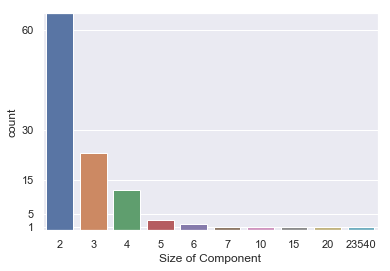

[1, 2, 3, 135, 12, 23]


In [8]:
components = [len(c) for c in sorted(nx.weakly_connected_components(G_full), key=len, reverse=True)]
components = pd.Series(components)

sns.set(style="darkgrid")
ax = sns.countplot(components)
plt.title('')
#'Distribution of Components\' Sizes'
plt.xlabel('Size of Component')
tics_locs = list(set(components.value_counts()))
ax.yaxis.set_major_locator(ticker.FixedLocator([1, 5, 15, 30, 60]))
ax.set_ylim(0,65)
plt.show()
#print(tics_locs)


### Outdegrees

In [604]:
out_degrees = pd.Series(sorted ( d for n, d in G_full.out_degree()))

#show basic stats
out_degrees[(out_degrees > 0) & (out_degrees <= 200)].describe()

count    493.000000
mean      23.823529
std       50.913198
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max      198.000000
dtype: float64

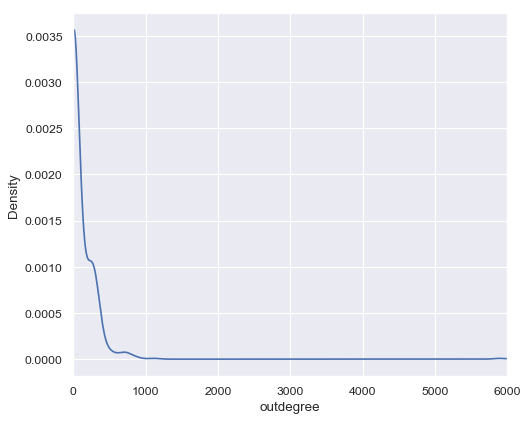

0       16055
1         281
2          60
3          23
4          15
281         4
196         4
294         4
290         4
133         3
295         3
152         3
277         3
148         3
310         3
35          3
6           3
134         3
283         3
315         3
314         3
301         3
285         2
136         2
14          2
19          2
298         2
282         2
170         2
154         2
        ...  
183         1
303         1
55          1
5892        1
8           1
470         1
390         1
374         1
262         1
230         1
198         1
407         1
40          1
202         1
345         1
138         1
42          1
1113        1
713         1
441         1
361         1
185         1
120         1
137         1
105         1
41          1
9           1
440         1
296         1
167         1
Length: 186, dtype: int64

In [692]:

plt.figure('''num=None''', figsize=(7, 6), dpi=80, facecolor='w', edgecolor='k')

#ax = sns.countplot(out_degrees[(out_degrees > 0) & (out_degrees <= 50)])
ax = out_degrees[(out_degrees > 0)].plot.density(xlim = (0,6000))
plt.title('') #Distribution of outdegrees / controlls relationships
plt.xlabel('outdegree')
#ax.xaxis.set_major_locator(ticker.FixedLocator([2,4,10,]))
#ax.set_xlim(2,500)
#plt.xticks(np.arange(1, 5750, 100))
#loc = ticker.MultipleLocator(10) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
plt.show()

out_degrees.value_counts()

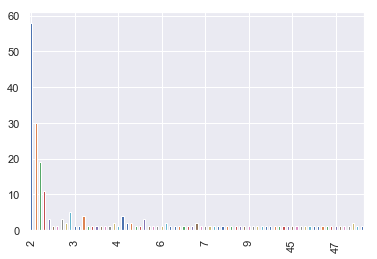

In [325]:
ax = pd.Series(out_degrees).value_counts().sort_index().plot.bar()
loc = ticker.MultipleLocator(10) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
#ax.set_xlim(1,6000)
plt.show()
#np.arange